In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('./data/ArM/ArM screening 5 positions complete data set.xlsx')
df_esm = pd.read_parquet("./data/ArM/streptavidin-esm2-karim.parquet")

In [5]:
df.nunique()
# type                   4
# variant             2085
# norm_TSNAK          3072
# norm_TFNAQ          3072
# OD                  1885
# indole               797
# plate                 32
# sequencing_reads     207
# dtype: int64

type                   4
variant             2085
norm_TSNAK          3072
norm_TFNAQ          3072
OD                  1885
indole               797
plate                 32
sequencing_reads     207
dtype: int64

In [6]:
df = df.dropna(subset='sequencing_reads')
df


,type,variant,norm_TSNAK,norm_TFNAQ,OD,indole,plate,sequencing_reads
11,control_TFNAQ,TFNAQ,7.657201,0.887791,0.2215,0.1314,8218,4.0
15,control_TFNAQ,TFNAQ,5.762989,0.668173,0.2916,0.0744,8222,3.0
32,mutant,TLIKQ,4.729278,0.548322,0.1172,0.0368,8173,157.0
33,mutant,KNNRQ,2.127514,0.246668,0.2076,0.0280,8174,156.0
34,mutant,LFNIQ,4.366710,0.506285,0.1432,0.0361,8175,119.0
...,...,...,...,...,...,...,...,...
3032,mutant,HVNSG,1.343131,0.155725,0.3362,0.0462,8304,176.0
3033,mutant,GVNSK,3.479768,0.403451,0.1286,0.0483,8305,130.0
3034,mutant,DKVYQ,3.596148,0.416945,0.1020,0.0404,8306,152.0
3036,mutant,TSESE,1.303062,0.151080,0.2329,0.0381,8308,165.0


In [7]:
# param = "T111H+S112F+N118L+A119S+K121Q" --> HFLSQ
def get_variant_from_params(param: str):
    return "".join([x[-1] for x in param.split("+")])
df_esm["variant"] = df_esm["params"].apply(get_variant_from_params)
# drop where no + in params
df_esm = df_esm[df_esm["params"].str.contains("\+")]

# merge the two dataframes
df = df.merge(df_esm, left_on="variant", right_on="variant", how="inner")

In [26]:
if isinstance(df['embedding-mean'][0], str):
    df['embedding-mean'] = df['embedding-mean'].apply(eval)
X = np.array(df['embedding-mean'].tolist())

import umap
reducer = umap.UMAP(n_components=10)
X_embedded = reducer.fit_transform(X)

data_set_dict = {
    "X": X,
    "X_embedded": X_embedded,
    "df": df,
}

import pickle
with open("./data_set_dict.pkl", "wb") as f:
    pickle.dump(data_set_dict, f)

<Axes: xlabel='umap-1', ylabel='umap-2'>

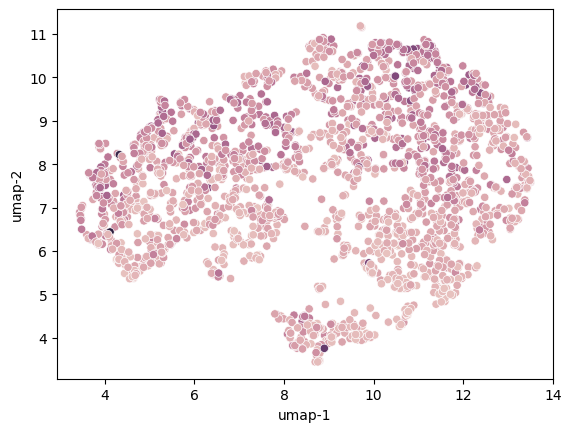

In [17]:
sns.scatterplot(data=df, x='umap-1', y='umap-2', hue='OD', legend=False)


In [ ]:
import torch
X_tensor = torch.tensor(X, dtype=torch.float32)
